# Resampling timescale to a longer periodicity

The goal of this notebook is to demonstrate how to adjust the timescale coordinate of a NetCDF file to reduce its resolution. 


First download the sample file from S3:

```
wget https://jataware-world-modelers.s3.amazonaws.com/analytic-layers/timescale_sample_1.nc
```

The above shell command will download a sample NetCDF file based on Topoflow model output.


### Requirements
```
matplotlib==3.4.2
numpy==1.20.3
xarray==0.19.0

```

In [65]:
%matplotlib inline

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

#### Load and examine the model output.

In [67]:
model_output = xr.open_dataset('timescale_sample_1.nc', engine='netcdf4')

#### Examine the model output time coordinate.  It has 4380 slices of 120 minutes resolution.

In [78]:
model_output.time

<xarray.DataArray 'time' (time: 4380)>
array([                0,     7200000000000,    14400000000000, ...,
       31514400000000000, 31521600000000000, 31528800000000000],
      dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 02:00:00 ... 364 days 22:00:00
Attributes:
    long_name:                 time
    time_units:                minutes
    time_coverage_resolution:  120.0
    time_coverage_start:       2015-01-01 00:00:00
    time_coverage_end:         2016-01-01 23:59:59
    time_coverage_duration:    527039.9833333333

#### Take a quick look at the data (Q: volumetric discharge) at a single time point (166 days 16 hours)

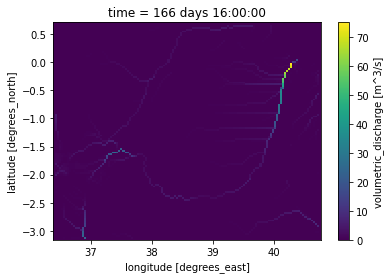

In [79]:
model_output.Q[2000,:,:].plot()

#### Reample the data from 2 hour resolution to 1 month. Because the dataset time series is not exactly 1 year, approximate 1 month using 31 days. This reduces the number of time slices from 4380 to 12.

#### We use two different aggregation methods, max() and mean(), for comparison.

In [93]:
model_output_1D_max = model_output.resample(time="31D").max()
model_output_1D_mean = model_output.resample(time="31D").mean()

<xarray.Dataset>
Dimensions:   (time: 12, X: 131, Y: 115)
Coordinates:
  * time      (time) timedelta64[ns] 0 days 31 days ... 310 days 341 days
  * X         (X) float64 36.4 36.43 36.47 36.5 36.53 ... 40.67 40.7 40.73 40.77
  * Y         (Y) float64 -3.143 -3.11 -3.076 -3.042 ... 0.6227 0.6564 0.69
Data variables:
    datetime  (time) object '2015-01-31 22:00:00' ... '2015-12-31 22:00:00'
    Q         (time, Y, X) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

#### We can plot the before and mean- and max- resampled data side-by-side to visually inspect it. 

#### Using a mean() value can suppress the scale (Panel B) compared to the raw data (Panel A). Using max() (Panel C) may be more appropriate depending on the type of data.

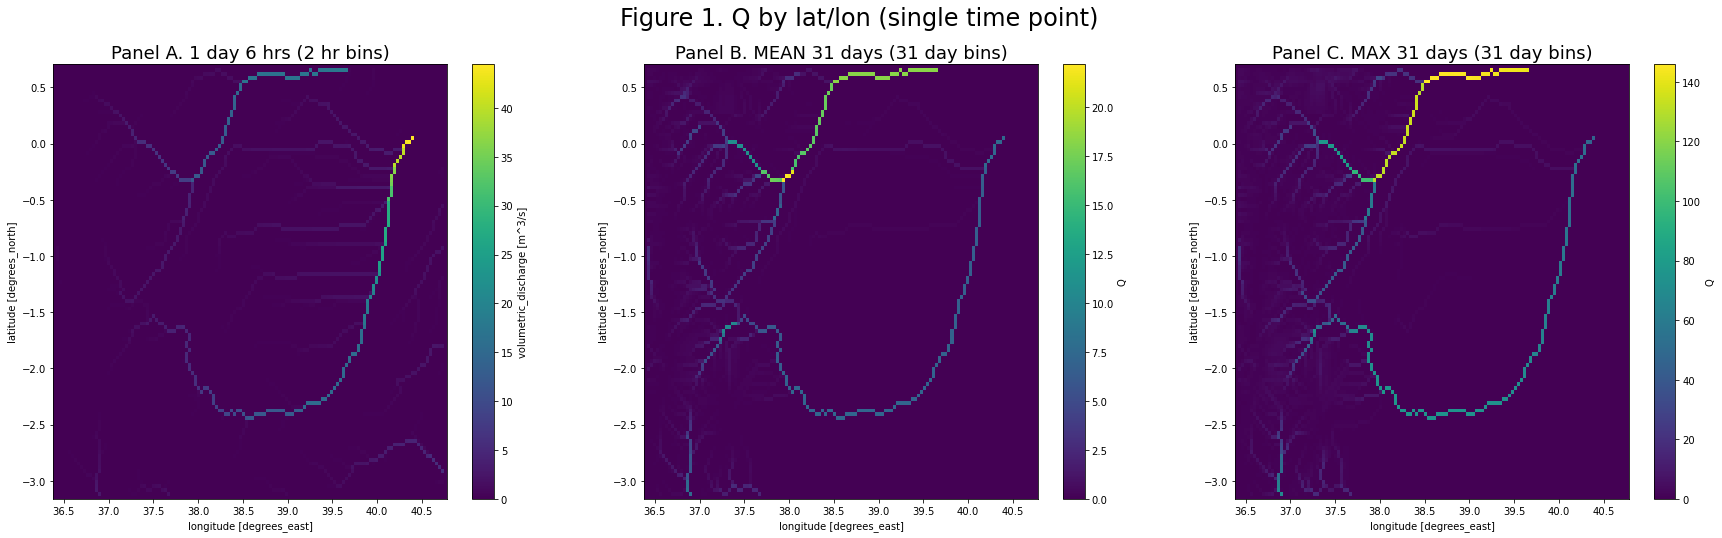

In [142]:
fig, axes = plt.subplots(ncols=3, figsize=(30, 8))

model_output.Q[15,:,:].plot(ax=axes[0])
axes[0].set_title("Panel A. 1 day 6 hrs (2 hr bins)", fontsize = 18)

model_output_1D_mean.Q[1,:,:].plot(ax=axes[1])
axes[1].set_title("Panel B. MEAN 31 days (31 day bins)", fontsize = 18)

model_output_1D_max.Q[1,:,:].plot(ax=axes[2])
axes[2].set_title("Panel C. MAX 31 days (31 day bins)", fontsize = 18)
fig.suptitle('Figure 1. Q by lat/lon (single time point) ', fontsize=24)
print()

#### We can also the data vs. time for a single point. Here we examine lat/lon 0.02/40.3 (x=117, y=94)

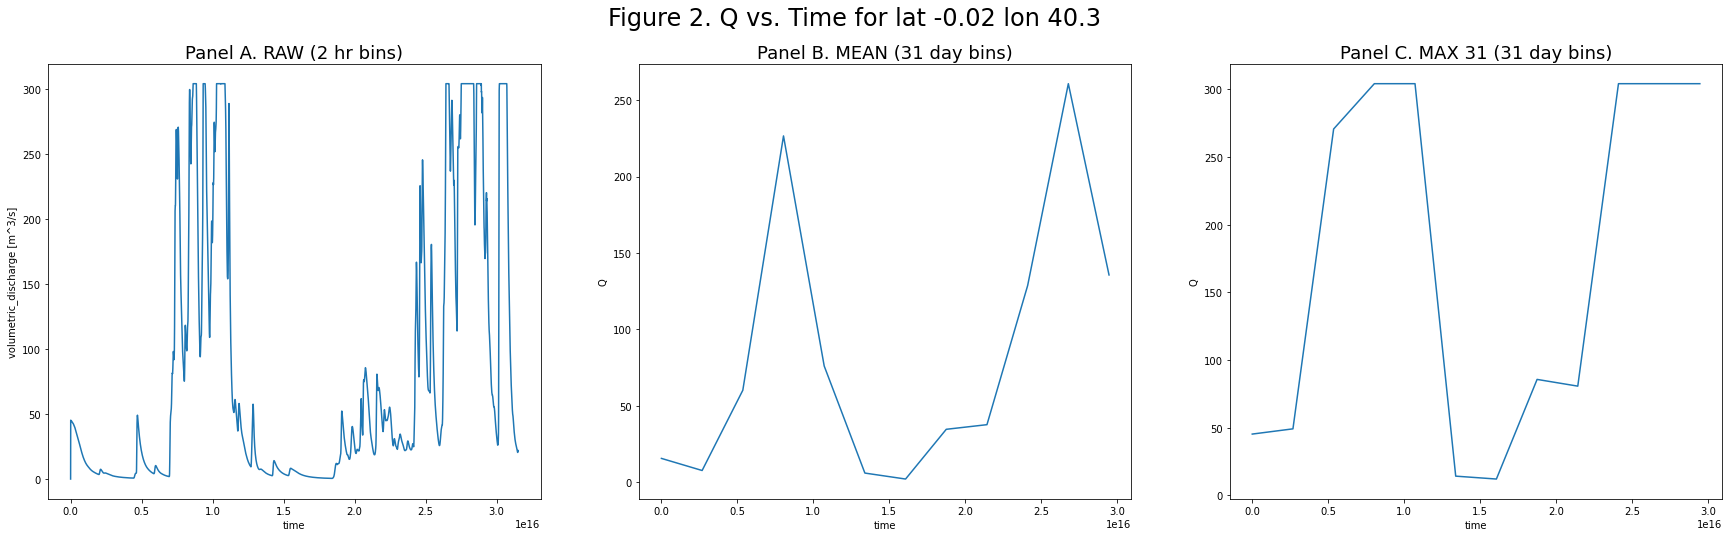

In [146]:
fig, axes = plt.subplots(ncols=3, figsize=(30, 8))

model_output.Q.isel(X=117, Y=94).plot(ax=axes[0])
axes[0].set_title("Panel A. RAW (2 hr bins)", fontsize = 18)

model_output_1D_mean.Q.isel(X=117, Y=94).plot(ax=axes[1])
axes[1].set_title("Panel B. MEAN (31 day bins)", fontsize = 18)

model_output_1D_max.Q.isel(X=117, Y=94).plot(ax=axes[2])
axes[2].set_title("Panel C. MAX 31 (31 day bins)", fontsize = 18)

fig.suptitle('Figure 2. Q vs. Time for lat -0.02 lon 40.3 ', fontsize=24)
print()